# k-Means Clustering
k-Means clustering is a type of unsupervised learning, which is used when we have unlabeled data. The main goal here is to find the group (clusters) for the unlabeled data, where number of clusters (group) is represented by 'k'.<br />
It works iteratively to assign each of the data point that we have to one of the k-groups based on the features that we have.

<b>Keypoint</b>: Data Points are clustered based on features similarity.

Each centroid (center) of the cluster (group) is a collection of feature values which defines the resulting clusters (groups).<br />
We can interpret what kind of group each cluster represents by examining the centroid feature weights.

# Working (Algorithm):
1. Initially we have data points let's say we have n data points denoted by \begin{equation*} x_1, x_2, . . . . , x_n \end{equation*} and a value of 'k' that defines the number of clusters (group) we want.

2. Randomly place centroids \begin{equation*} c_1, c_2 ..... , c_k \end{equation*}. Each centroid represents one of the cluster. 

3. <b>Data Assigment Step</b>:<br />
    In this step we assign each data point to its nearest centroid by calculating the <i><b>euclidean distance</b></i> b/w each of the centroid and the data point.
    \begin{equation*}
    \text{$EuclideanDistance$} = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2}
    \end{equation*}
    
4. <b>Centroid  Update Step</b>:<br />
    Here, each of the centroids are recomputed. This is done by taking mean of all the data points assigned to that centroid's cluster.
    \begin{equation*}
     C_i = \frac{1}{N}{\left (\sum_{i=1}^N x_i \right)}
    \end{equation*}
    The mean value is the new centroid for that cluster.
4. Repeat Step 3 & 4 iteratively until convergence is achieved i.e no data point changes cluster or the sum of dis

# Let's implement it.

In [1]:
# Import Libraries.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Calculate Euclidian Distance
def euclidian(a, b):
    return np.linalg.norm(a-b)

In [3]:
def k_means(X, k, epsilon=0):
    # Number of Instance (rows) and Number of Features (columns)
    num_instances, num_features = X.shape

    # Randomly assign k centroids
    # Here, we are randomly selecting from the data set
    centroids = X[np.random.randint(0, num_instances-1, size=k)]

    #variable to keep track of centroid at every iteration
    old_centroids = np.zeros(centroids.shape)

    #variable to store clusters
    belongs_to = np.zeros((num_instances, 1))

    # Calculate the distance for starting
    norm = euclidian(centroids, old_centroids)

    # Variable to keep track of iterations
    iteration = 0

    # Repeat until norm is > than epsilon
    while norm > epsilon:
        iteration += 1

        # Update norm by calculating the distance b/w current centroids and old centroids
        norm = euclidian(centroids, old_centroids)

        # update the centroid
        old_centroids = centroids

        # Data Assignment Step:
        # for each datapoint in the dataset
        for index_data_point, data_point in enumerate(X):
            # Calculate the distance b/w datapoint and each of the centroid
            # We'll store the each distance in a distance vector
            dist_vec = np.zeros((k, 1))

            # for each centroid
            for index_centroid, centroid in enumerate(centroids):
                # Distance b/w centroid and data_point
                dist_vec[index_centroid] = euclidian(centroid, data_point)

            # finding the minimum distance and storing it in belongs_to
            # points are assigned to the nearest centroid
            belongs_to[index_data_point, 0] = np.argmin(dist_vec)

        temp_prototype = np.zeros((k, num_features))

        # Centroid Update Step:
        # for each cluster 
        for index in range(len(centroids)):
            # get all the data points assigned to the cluster
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]

            # find the mean of all the data point assigned to the centroid of the cluster
            # Now, this is our new centroid
            mean = np.mean(X[instances_close],  axis=0)

            # add new centroid to the temp list
            temp_prototype[index, :] = mean

        # set the new list to the current list
        centroids = temp_prototype

    #return calculated centroids and assignments for which cluster each datapoint belongs to
    return centroids, belongs_to

In [4]:
dataset = np.loadtxt('durudataset.txt')

# Belongs contains where each data point was assigned to which of the cluster
# Centroids represents the Centroid that were made 
# Here, as k=2 we jave two centroids
Centroids, Belongs = k_means(dataset, 2)

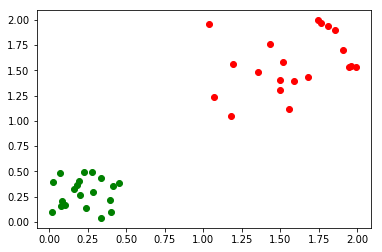

In [8]:
# Let's Plot the Centroid and Belongs
colors = ['r', 'g']

fig, ax = plt.subplots()

for index in range(dataset.shape[0]):
    instances_close = [i for i in range(len(Belongs)) if Belongs[i] == index]
    for instance_index in instances_close:
        ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))

plt.show()

Our data points were clustered into two groups (red and green).